<a href="https://colab.research.google.com/github/steven1174/Data_Science_Handbook/blob/main/C2%20Numpy/6.Comparisons%2C%20Masks%2C%20and%20Boolean%20Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparisons, Masks, and Boolean Logic
## Example: Counting Rainy Days

In [45]:
import numpy as np
import pandas as pd

In [46]:
url = 'https://raw.githubusercontent.com/steven1174/Data_Science_Handbook/main/Data/Seattle2014.csv'
rainfall = pd.read_csv(url)['PRCP'].values
inches = rainfall/254 # 1/10mm -> inches
inches.shape

(365,)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

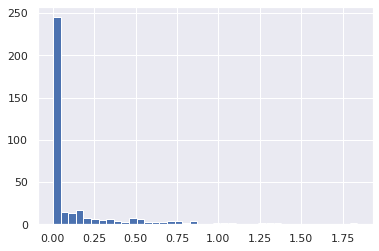

In [49]:
plt.hist(inches, 40)

## Comparison Operators as ufuncs

In [51]:
x = np.array([1, 2, 3, 4, 5])

x < 3 # less than
x > 3 # greater than
x <= 3 # less than or equal
x >= 3 # greater than or equal
x != 3 # not equal
x == 3 # equal

array([False, False,  True, False, False])

In [52]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

<html>
<head>
<style>
table {
  font-family: Times New Roman, sans-serif;
  width: 100%;
}
td, th {
  border: 2px solid #dddddd;
  text-align: center;
  padding: 8px;
}
tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>

<body>
<table>
  <tr>  
    <th>Operator</th>
    <th>Equivalent ufunc</th>
  </tr>
  <tr>
    <td>==</td>
    <td>np.equal</td>
  </tr>
  <tr>
    <td>!=</td>
    <td>np.not_equal</td>
  </tr>
  <tr>
    <td><</td>
    <td>np.less</td>
  </tr>
  <tr>
    <td><=</td>
    <td>np.less_equal</td>
  </tr>
  <tr>
    <td>></td>
    <td>np.greater</td>
  </tr>
  <tr>
    <td>>=</td>
    <td>np.greater_equal</td>
  </tr>
</table>

</body>
</html>

In [53]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [54]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In [55]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

### Counting entries

In [56]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [57]:
np.sum(x < 6)

8

In [58]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [59]:
# are there any values greater than 8?
np.any(x > 8)

True

In [60]:
# are there any values less than zero?
np.any(x < 0)

False

In [61]:
# are all values less than 10?
np.all(x < 10)

True

In [62]:
# are all values equal to 6?
np.all(x == 6)

False

In [63]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Boolean operators

In [64]:
np.sum((inches > 0.5) & (inches < 1))

29

In [65]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

<html>
<head>
<style>
table {
  font-family: Times New Roman, sans-serif;
  width: 100%;
}
td, th {
  border: 2px solid #dddddd;
  text-align: center;
  padding: 8px;
}
tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>

<body>
<table>
  <tr>  
    <th>Operator</th>
    <th>Equivalent ufunc</th>
  </tr>
  <tr>
    <td>&</td>
    <td>np.bitwise_and</td>
  </tr>
  <tr>
    <td>|</td>
    <td>np.bitwise_or</td>
  </tr>
  <tr>
    <td>^</td>
    <td>np.bitwise_xor</td>
  </tr>
  <tr>
    <td>~</td>
    <td>np.bitwise_not</td>
  </tr>
</table>

</body>
</html>

In [66]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


## Boolean Arrays as Masks

In [67]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [69]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [70]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [72]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


## *Using the Keywords and/or Versus the Operators &/|*
One common point of confusion is the difference between the keywords *and* and *or* on one hand, and the operators & and | on the other hand.

The difference is this: *and* and *or* gauge the truth or falsehood of entire object, while & and | refer to bits within each object.

When you use *and* or *or*, it’s equivalent to asking Python to treat the object as a single Boolean entity. In Python, all nonzero integers will evaluate as True. Thus:

In [73]:
bool(42), bool(0)

(True, False)

In [74]:
bool(42 and 0)

False

In [75]:
bool(42 or 0)

True

When you use & and | on integers, the expression operates on the bits of the element, applying the *and* or the *or* to the individual bits making up the number:

In [76]:
bin(42)

'0b101010'

In [77]:
bin(59)

'0b111011'

In [78]:
bin(42 & 59)

'0b101010'

In [79]:
bin(42 | 59)

'0b111011'

Notice that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where 1 = True and 0 = False, and the result of & and | operates in a similar manner as before:

In [80]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])